In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlrd
import random
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

把科學記號改成十進位

In [2]:
import pandas as pd
import decimal

# 讀取CSV文件，確保資料的精度
df = pd.read_csv('data/combined_dataset_all.csv', encoding='utf-8-sig', dtype=str)

# 將Chlorophyll欄位轉換為不使用科學記號的小數形式
df['Chlorophyll'] = df['Chlorophyll'].apply(lambda x: format(decimal.Decimal(x), 'f'))

# 輸出篩選後的結果到原本的CSV文件
df.to_csv('data/combined_dataset_all.csv', index=False, encoding='utf-8-sig')


先取出1000000筆來train看看

In [3]:
import pandas as pd

# 讀取CSV文件
combined_df = pd.read_csv("data/combined_dataset_all.csv")

# 隨機選取10000筆資料
sampled_df = combined_df.sample(n=1000000, random_state=1)

# 保存為新的CSV文件
sampled_df.to_csv("data/train_combined_dataset_all.csv", index=False)

print("已成功從 combined_dataset_all.csv 中選取 1000000 筆資料並保存到 data/train_combined_dataset_all.csv")


已成功從 combined_dataset_all.csv 中選取 1000000 筆資料並保存到 data/train_combined_dataset_all.csv


In [4]:
data = pd.read_csv("data/train_combined_dataset_all.csv")

In [5]:
data.info()
data.describe()
data.shape
print(data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   GOCI2_Latitude      1000000 non-null  float64
 1   GOCI2_Longitude     1000000 non-null  float64
 2   Himawari_Latitude   1000000 non-null  float64
 3   Himawari_Longitude  1000000 non-null  float64
 4   Chlorophyll         1000000 non-null  float64
 5   Albedo_01           1000000 non-null  float64
 6   Albedo_02           1000000 non-null  float64
 7   Albedo_03           1000000 non-null  float64
 8   Albedo_04           1000000 non-null  float64
dtypes: float64(9)
memory usage: 68.7 MB
Index(['GOCI2_Latitude', 'GOCI2_Longitude', 'Himawari_Latitude',
       'Himawari_Longitude', 'Chlorophyll', 'Albedo_01', 'Albedo_02',
       'Albedo_03', 'Albedo_04'],
      dtype='object')


### output filtered csv

In [6]:
# 選擇所需的列
selected_columns = ['Albedo_01', 'Albedo_02', 'Albedo_03', 'Albedo_04', 'Chlorophyll']

# 過濾數據
filtered_data = data[selected_columns]

## 重命名列，去掉 '2km_'
#filtered_data.columns = ['albedo_01', 'albedo_02', 'albedo_03', 'albedo_04', 'Chlorophyll']
#
# 將過濾後的數據寫入新的CSV文件
filtered_data.to_csv("data/train_nn_filtered_data.csv", index=False)

print("新的 CSV 文件已成功輸出，文件名為 data/train_nn_filtered_data.csv")

新的 CSV 文件已成功輸出，文件名為 data/train_nn_filtered_data.csv


移除包含 '<' 符號的行(因非海保署資料，故已不再需要)

In [7]:
# import pandas as pd
# 
# # 讀取CSV文件，確保資料的精度
# df = pd.read_csv('data/train_nn_filtered_data.csv', encoding='utf-8-sig', dtype=str)
# 
# # 移除包含 '<' 符號的行
# filtered_df = df[~df.apply(lambda row: row.str.contains('<|,').any(), axis=1)]
# 
# # 輸出篩選後的結果到新的CSV文件
# filtered_df.to_csv('data/train_filtered_and_trimmed_data.csv', index=False, encoding='utf-8-sig')
# 

科學記號轉小數看看

In [8]:
import pandas as pd
import decimal

# 讀取CSV文件，確保資料的精度
df = pd.read_csv('data/train_nn_filtered_data.csv', encoding='utf-8-sig', dtype=str)

# 將Chlorophyll欄位轉換為不使用科學記號的小數形式
df['Chlorophyll'] = df['Chlorophyll'].apply(lambda x: format(decimal.Decimal(x), 'f'))

# 輸出篩選後的結果到原本的CSV文件
df.to_csv('data/train_nn_filtered_data.csv', index=False, encoding='utf-8-sig')

資料的描述以及葉綠素值的分布圖

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Albedo_01    1000000 non-null  float64
 1   Albedo_02    1000000 non-null  float64
 2   Albedo_03    1000000 non-null  float64
 3   Albedo_04    1000000 non-null  float64
 4   Chlorophyll  1000000 non-null  float64
dtypes: float64(5)
memory usage: 38.1 MB
            Albedo_01       Albedo_02       Albedo_03       Albedo_04  \
count  1000000.000000  1000000.000000  1000000.000000  1000000.000000   
mean         0.123921        0.087747        0.041779        0.025416   
std          0.031494        0.031931        0.033546        0.040171   
min          0.076100        0.048700        0.020600        0.001800   
25%          0.110500        0.073700        0.029000        0.011900   
50%          0.117100        0.080800        0.034600        0.016000   
75%          0.126600        

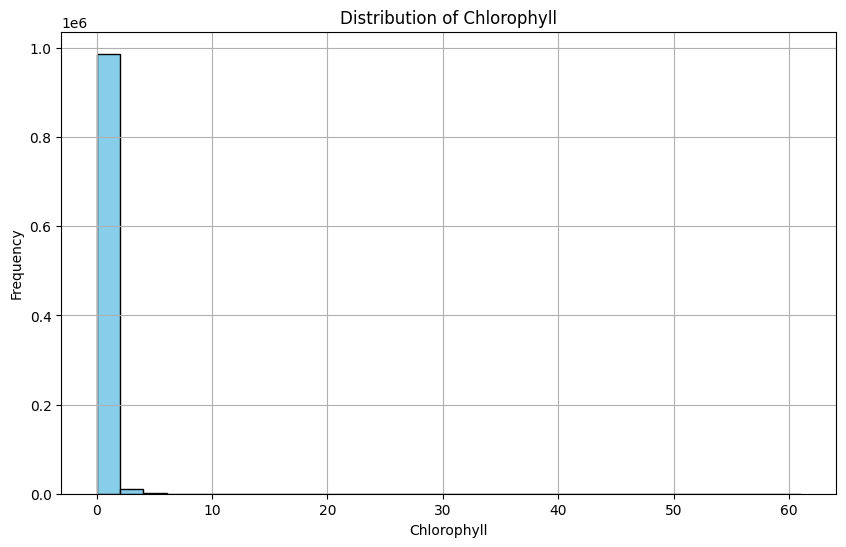

In [9]:


import pandas as pd
import matplotlib.pyplot as plt

# 讀取CSV文件
data = pd.read_csv("data/train_nn_filtered_data.csv")

# 確認數據的資訊
data.info()

# 顯示基本統計描述
print(data.describe())

# 顯示數據的形狀
print(data.shape)

# 顯示數據的欄位名稱
print(data.columns)

# 畫出Chlorophyll的分布圖
plt.figure(figsize=(10, 6))
plt.hist(data['Chlorophyll'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Chlorophyll')
plt.xlabel('Chlorophyll')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()







去除極端值

原始數據的描述性統計量:
count    1000000.000000
mean           0.296983
std            0.444100
min            0.000000
25%            0.102800
50%            0.169073
75%            0.346958
max           61.048622
Name: Chlorophyll, dtype: float64

過濾後數據的描述性統計量:
count    864533.000000
mean          0.189094
std           0.118359
min           0.000000
25%           0.097228
50%           0.142693
75%           0.256470
max           0.499999
Name: Chlorophyll, dtype: float64


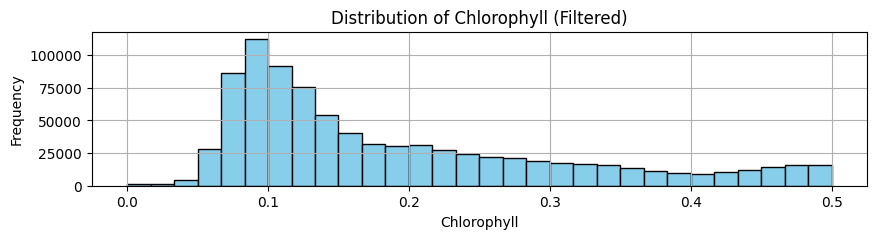

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 讀取CSV文件
data = pd.read_csv("data/train_nn_filtered_data.csv")

# 顯示原始數據的描述性統計量
print("原始數據的描述性統計量:")
print(data['Chlorophyll'].describe())

# 去除Chlorophyll值大於6的極端值
data = data[data['Chlorophyll'] <= 0.5]

# 顯示過濾後數據的描述性統計量
print("\n過濾後數據的描述性統計量:")
print(data['Chlorophyll'].describe())

# 畫出過濾後Chlorophyll的分布圖
plt.figure(figsize=(10, 2))
plt.hist(data['Chlorophyll'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Chlorophyll (Filtered)')
plt.xlabel('Chlorophyll')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


count

In [11]:
print(data.Chlorophyll.count())
print(data.Albedo_01.count())
print(data.Albedo_02.count())
print(data.Albedo_03.count())
print(data.Albedo_04.count())

864533
864533
864533
864533
864533


In [12]:
train = data
train.info()
train.Chlorophyll.value_counts()

<class 'pandas.core.frame.DataFrame'>
Index: 864533 entries, 1 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Albedo_01    864533 non-null  float64
 1   Albedo_02    864533 non-null  float64
 2   Albedo_03    864533 non-null  float64
 3   Albedo_04    864533 non-null  float64
 4   Chlorophyll  864533 non-null  float64
dtypes: float64(5)
memory usage: 39.6 MB


Chlorophyll
0.000000    17
0.112107     5
0.137149     5
0.111646     5
0.090356     5
            ..
0.135635     1
0.210380     1
0.103310     1
0.136888     1
0.295498     1
Name: count, Length: 804633, dtype: int64

In [13]:
X = train.drop('Chlorophyll', axis=1)
y = train.Chlorophyll
y.value_counts()

Chlorophyll
0.000000    17
0.112107     5
0.137149     5
0.111646     5
0.090356     5
            ..
0.135635     1
0.210380     1
0.103310     1
0.136888     1
0.295498     1
Name: count, Length: 804633, dtype: int64

### Scalar

In [14]:
scaler = StandardScaler()
# scale the data to make it easier for the model to learn
X = scaler.fit_transform(X)

### Train

In [15]:
test_ratio = 0.2

random_seed = random.randint(1, 100)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_ratio, random_state=42)

param_grid = {
    'hidden_layer_sizes': [(100,)],
    'alpha': [0.0001, 0.001, 0.01, 0.05],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'activation': ['tanh', 'relu']
}



In [259]:
# Create an MLPRegressor instance
mlp = MLPRegressor(solver='sgd', max_iter=200,
                   n_iter_no_change=10, tol=0.0001, verbose=1)

# Create a GridSearchCV instance
grid_mlp = GridSearchCV(
    mlp, param_grid, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1, cv=5)

# Fit the grid search to the data
grid_mlp.fit(X_train, y_train)

# Get the best estimator
optimized_mlp = grid_mlp.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Iteration 1, loss = 0.01088479
Iteration 2, loss = 0.00933436
Iteration 3, loss = 0.00894311
Iteration 4, loss = 0.00879694
Iteration 5, loss = 0.00875408
Iteration 6, loss = 0.00869597
Iteration 7, loss = 0.00866503
Iteration 8, loss = 0.00863745
Iteration 9, loss = 0.00861197
Iteration 10, loss = 0.00857512
Iteration 11, loss = 0.00855036
Iteration 12, loss = 0.00852742
Iteration 13, loss = 0.00851615
Iteration 14, loss = 0.00849321
Iteration 15, loss = 0.00847408
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


NN模型第二版

In [16]:
param_grid = {
    'hidden_layer_sizes': [(100,), (100, 50), (100, 100, 50)],
    'alpha': [0.0001, 0.001, 0.01, 0.05],
    'learning_rate_init': [0.0001, 0.001, 0.01, 0.05],
    'activation': ['tanh', 'relu']
}
mlp = MLPRegressor(solver='adam', max_iter=500, n_iter_no_change=20, tol=0.0001, verbose=1)
grid_mlp = GridSearchCV(mlp, param_grid, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1, cv=5)
grid_mlp.fit(X_train, y_train)
# Get the best estimator
optimized_mlp = grid_mlp.best_estimator_

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Iteration 1, loss = 0.00260403
Iteration 2, loss = 0.00232093
Iteration 3, loss = 0.00229586
Iteration 4, loss = 0.00227341
Iteration 5, loss = 0.00225960
Iteration 6, loss = 0.00225195
Iteration 7, loss = 0.00224621
Iteration 8, loss = 0.00224094
Iteration 9, loss = 0.00223701
Iteration 10, loss = 0.00223443
Iteration 11, loss = 0.00223164
Iteration 12, loss = 0.00223067
Iteration 13, loss = 0.00222813
Iteration 14, loss = 0.00222468
Iteration 15, loss = 0.00222264
Iteration 16, loss = 0.00222052
Iteration 17, loss = 0.00222177
Iteration 18, loss = 0.00221911
Iteration 19, loss = 0.00222087
Iteration 20, loss = 0.00221747
Iteration 21, loss = 0.00221800
Iteration 22, loss = 0.00221660
Iteration 23, loss = 0.00221562
Training loss did not improve more than tol=0.000100 for 20 consecutive epochs. Stopping.


In [17]:
# Print the best parameters found by the grid search
print("MLP best parameters:", grid_mlp.best_params_)

# Make predictions
MLP_train_pred = optimized_mlp.predict(X_train)
MLP_test_pred = optimized_mlp.predict(X_test)

# Calculate the desired metrics
train_mae = mean_absolute_error(y_train, MLP_train_pred)
test_mae = mean_absolute_error(y_test, MLP_test_pred)
train_rmse = sqrt(mean_squared_error(y_train, MLP_train_pred))
test_rmse = sqrt(mean_squared_error(y_test, MLP_test_pred))
train_r2 = r2_score(y_train, MLP_train_pred)
test_r2 = r2_score(y_test, MLP_test_pred)

# Print the calculated metrics
print(f"Train MAE: {train_mae}")
print(f"Test MAE: {test_mae}")
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(f"Train R2: {train_r2}")
print(f"Test R2: {test_r2}")


MLP best parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100, 50), 'learning_rate_init': 0.001}
Train MAE: 0.04544314582279486
Test MAE: 0.04550757005686396
Train RMSE: 0.06602368146072309
Test RMSE: 0.06616766340693175
Train R2: 0.6887073630883045
Test R2: 0.6879673887269256


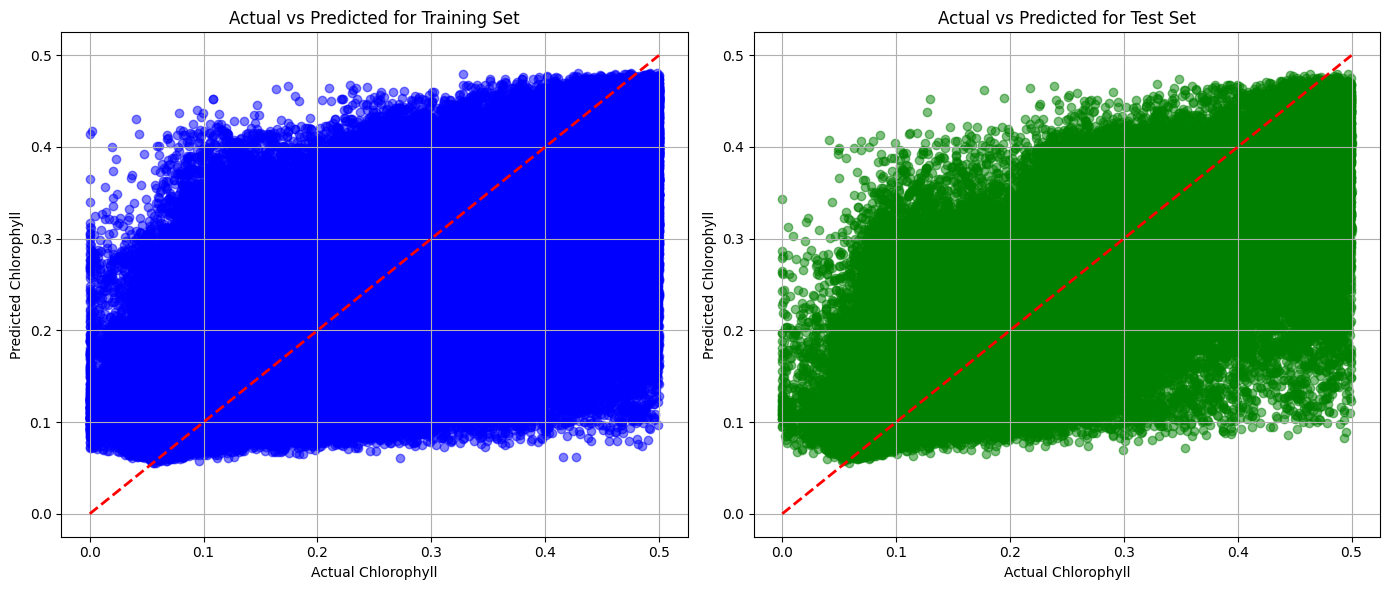

In [18]:
import matplotlib.pyplot as plt

# Assuming you have already run the previous code and have MLP_train_pred and MLP_test_pred ready

# Combine actual and predicted values for train and test sets
train_results = pd.DataFrame({'Actual': y_train, 'Predicted': MLP_train_pred})
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': MLP_test_pred})

# Plot actual vs predicted for the training set
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(train_results['Actual'], train_results['Predicted'], alpha=0.5, color='blue')
plt.plot([train_results['Actual'].min(), train_results['Actual'].max()], 
         [train_results['Actual'].min(), train_results['Actual'].max()], 'r--', lw=2)
plt.title('Actual vs Predicted for Training Set')
plt.xlabel('Actual Chlorophyll')
plt.ylabel('Predicted Chlorophyll')
plt.grid(True)

# Plot actual vs predicted for the test set
plt.subplot(1, 2, 2)
plt.scatter(test_results['Actual'], test_results['Predicted'], alpha=0.5, color='green')
plt.plot([test_results['Actual'].min(), test_results['Actual'].max()], 
         [test_results['Actual'].min(), test_results['Actual'].max()], 'r--', lw=2)
plt.title('Actual vs Predicted for Test Set')
plt.xlabel('Actual Chlorophyll')
plt.ylabel('Predicted Chlorophyll')
plt.grid(True)

plt.tight_layout()
plt.show()


輸出不同解析度的圖

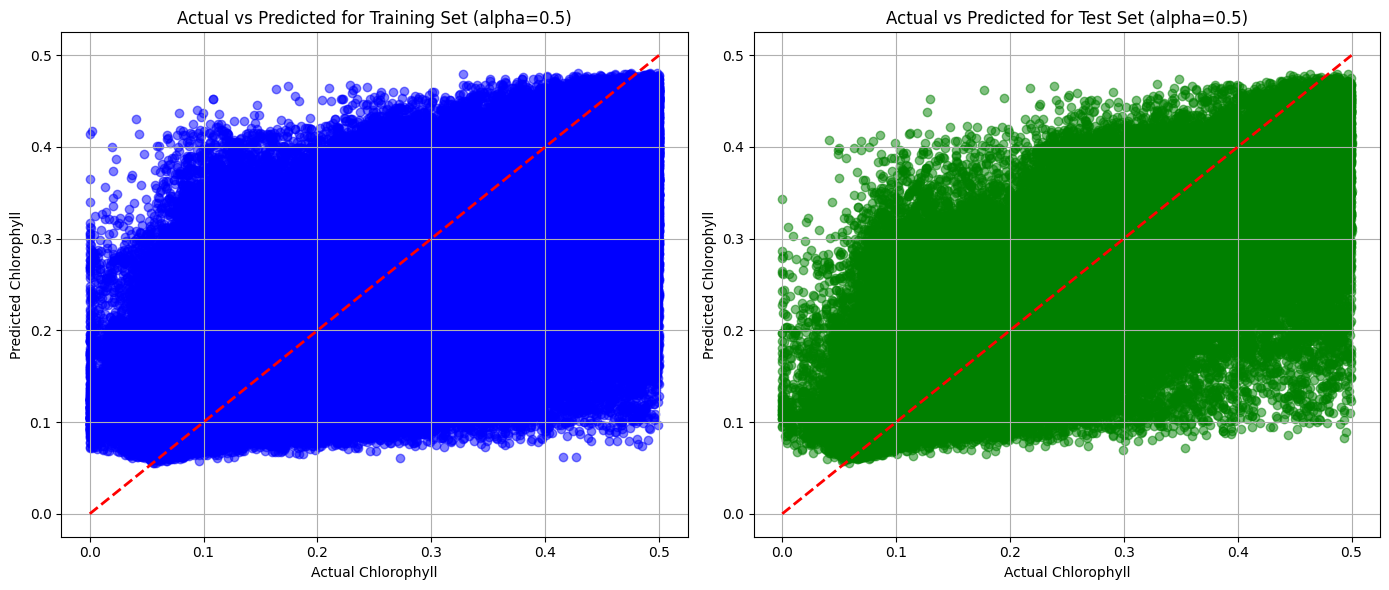

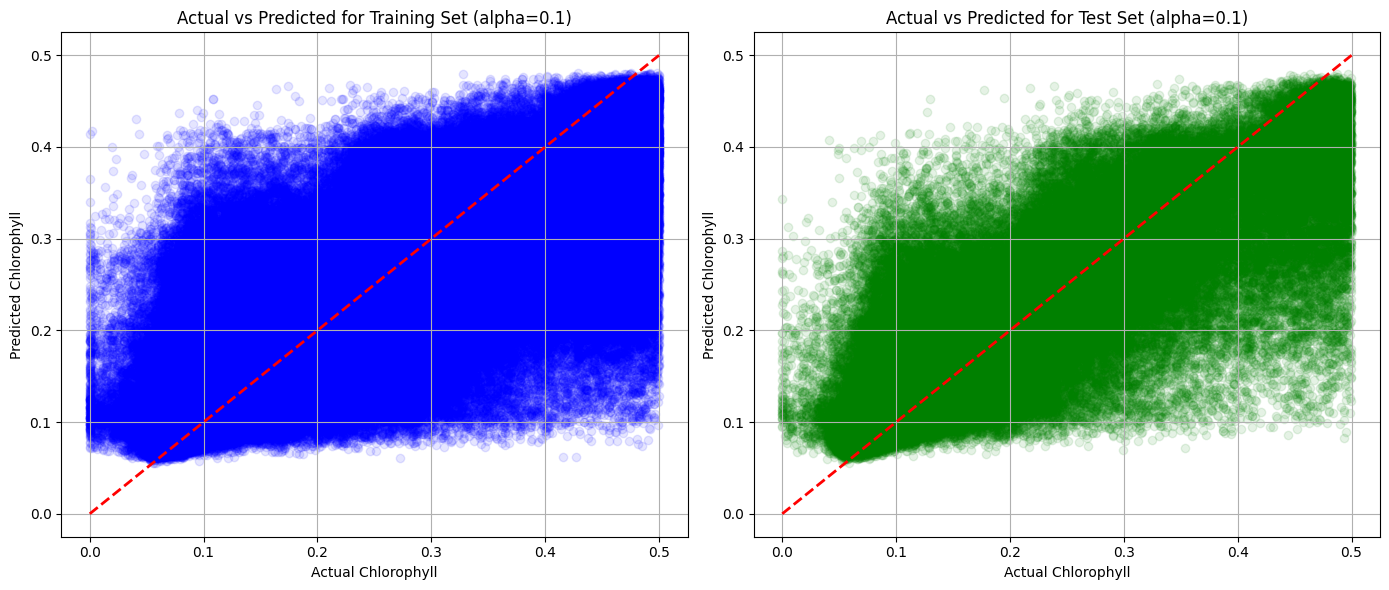

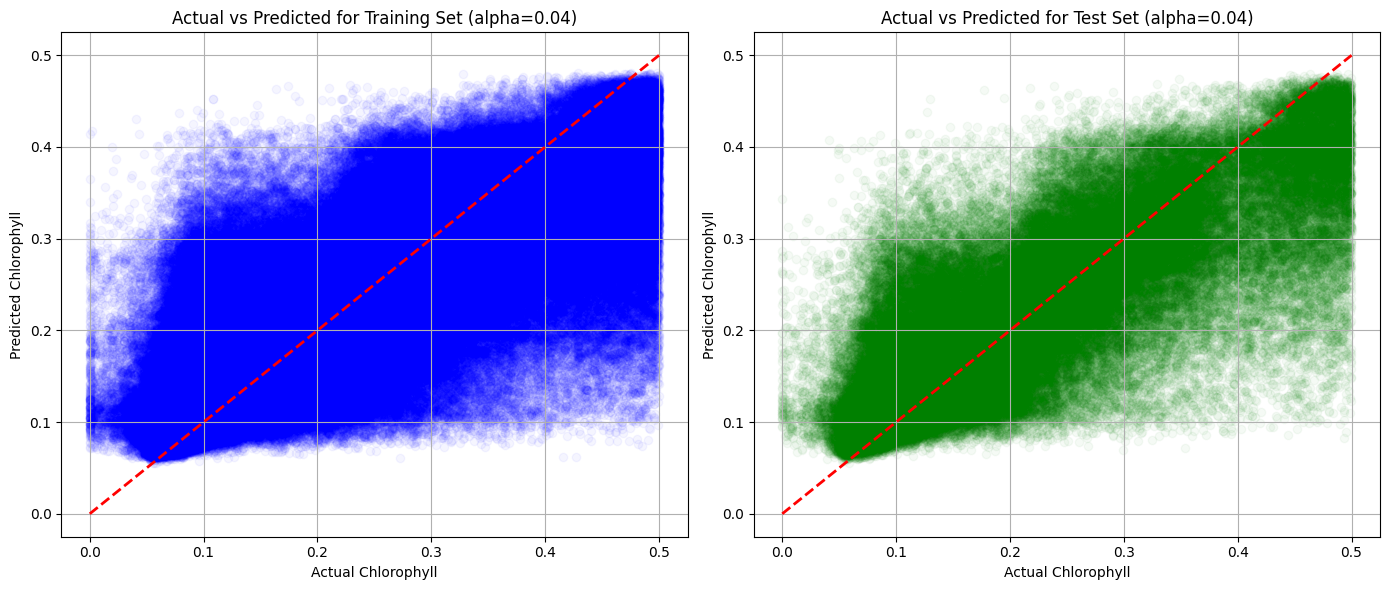

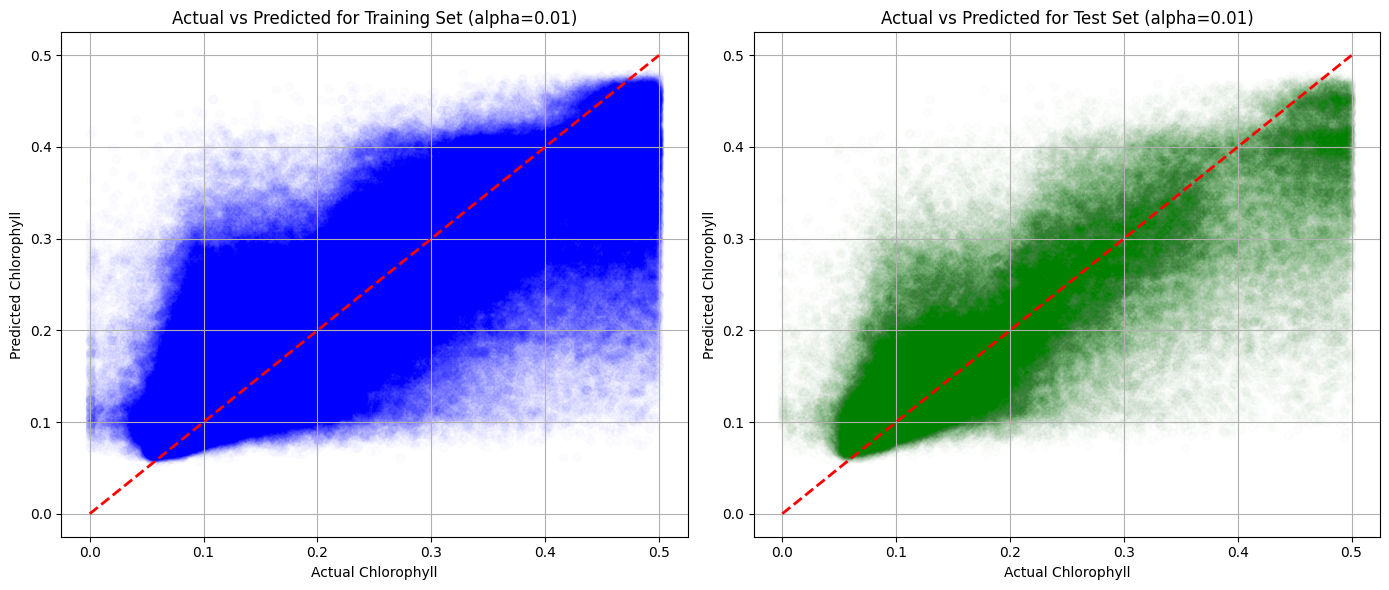

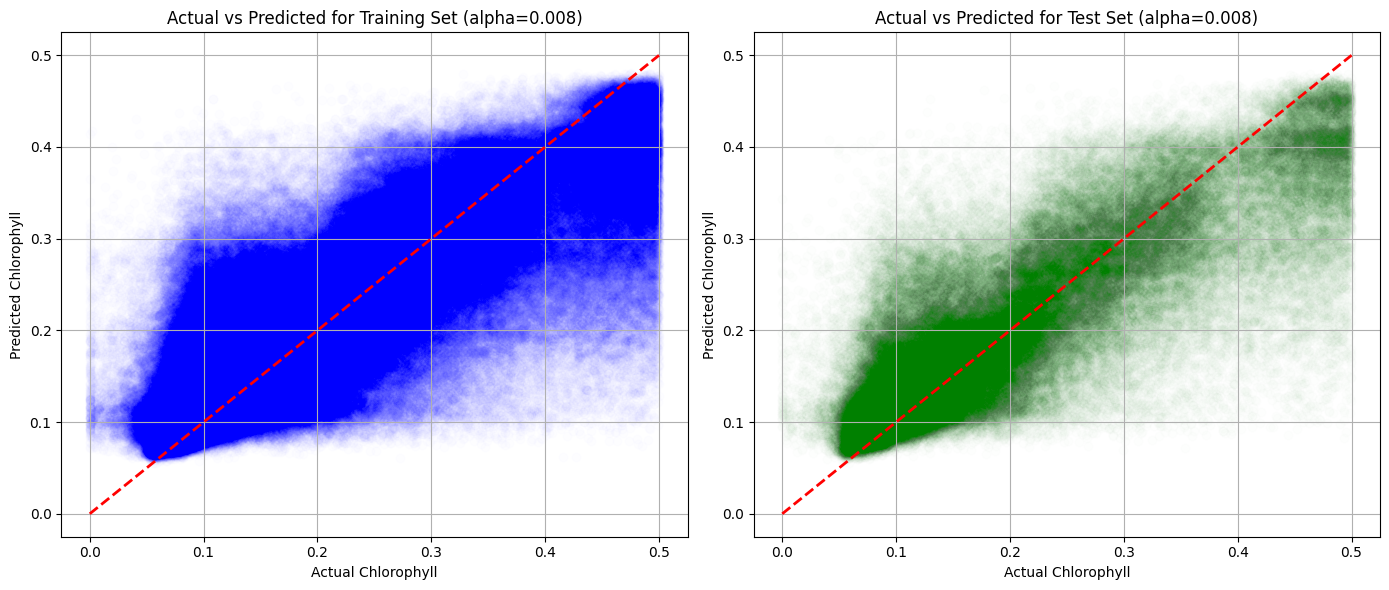

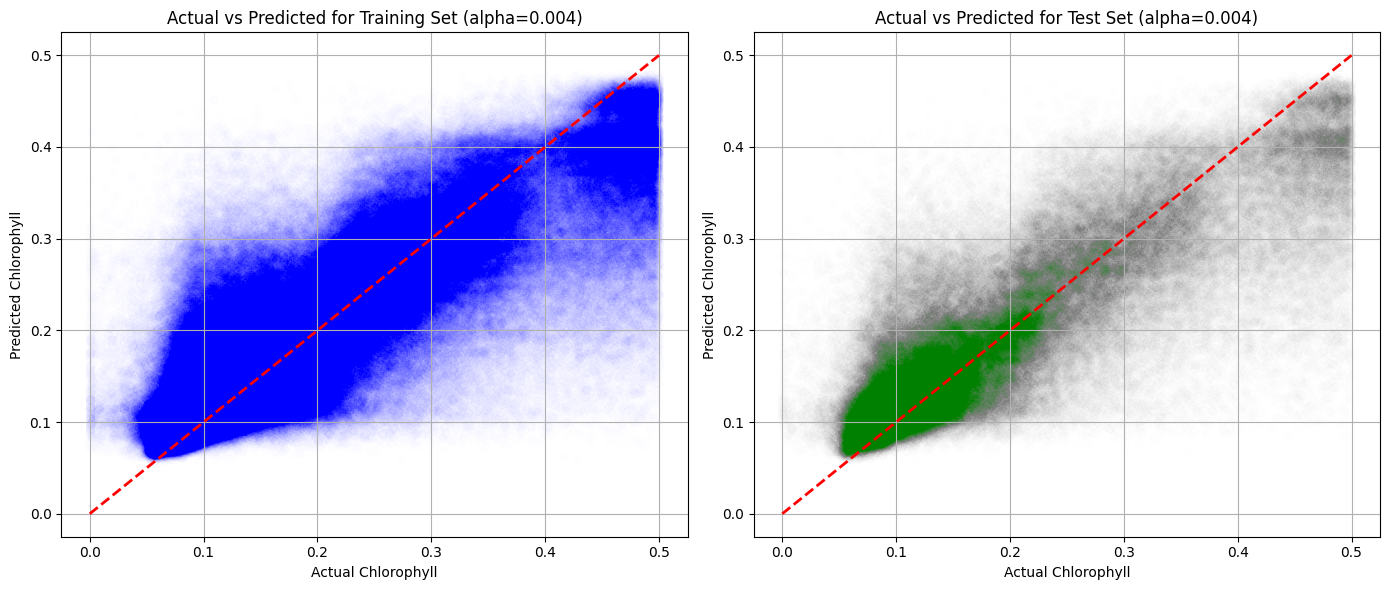

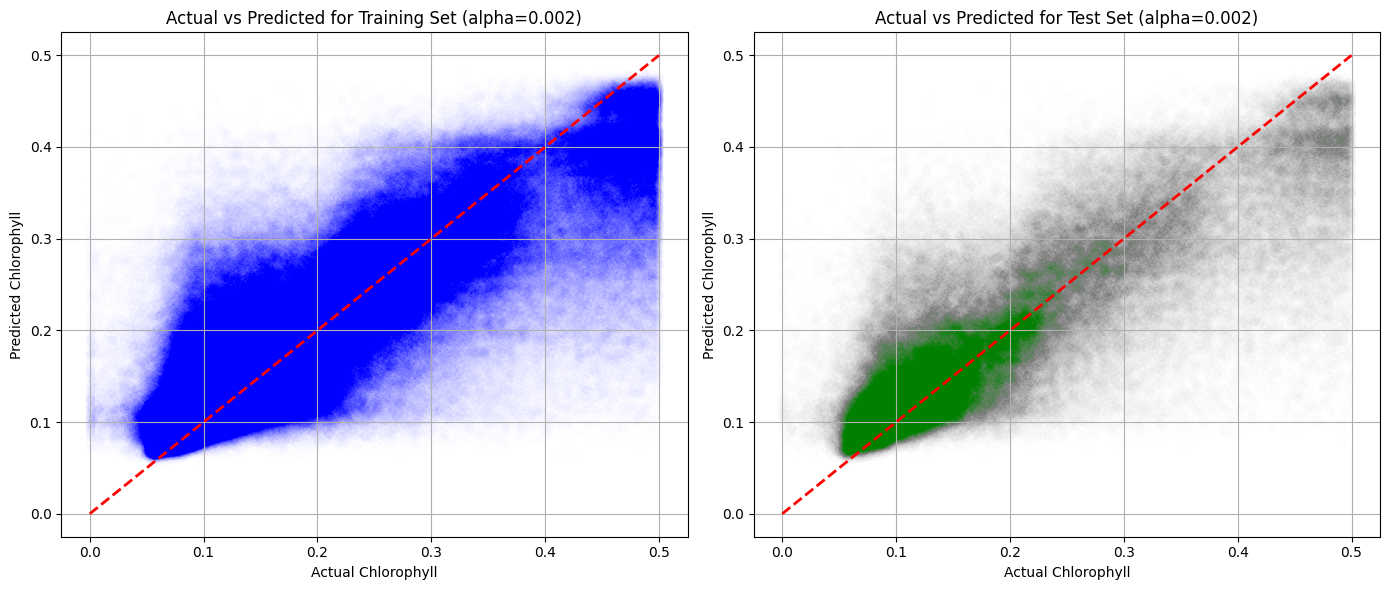

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# 假設你已經有 y_train, y_test, MLP_train_pred 和 MLP_test_pred 的數據

# Combine actual and predicted values for train and test sets
train_results = pd.DataFrame({'Actual': y_train, 'Predicted': MLP_train_pred})
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': MLP_test_pred})

# alpha值的列表
alpha_values = [0.5, 0.1, 0.04, 0.01, 0.008, 0.004, 0.002]

# 使用迴圈來生成每個alpha值的圖
for alpha in alpha_values:
    # Plot actual vs predicted for the training set
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.scatter(train_results['Actual'], train_results['Predicted'], alpha=alpha, color='blue')
    plt.plot([train_results['Actual'].min(), train_results['Actual'].max()], 
             [train_results['Actual'].min(), train_results['Actual'].max()], 'r--', lw=2)
    plt.title(f'Actual vs Predicted for Training Set (alpha={alpha})')
    plt.xlabel('Actual Chlorophyll')
    plt.ylabel('Predicted Chlorophyll')
    plt.grid(True)

    # Plot actual vs predicted for the test set
    plt.subplot(1, 2, 2)
    plt.scatter(test_results['Actual'], test_results['Predicted'], alpha=alpha, color='green')
    plt.plot([test_results['Actual'].min(), test_results['Actual'].max()], 
             [test_results['Actual'].min(), test_results['Actual'].max()], 'r--', lw=2)
    plt.title(f'Actual vs Predicted for Test Set (alpha={alpha})')
    plt.xlabel('Actual Chlorophyll')
    plt.ylabel('Predicted Chlorophyll')
    plt.grid(True)

    plt.tight_layout()
    plt.show()


直接輸出比較

只取1/10點畫看看

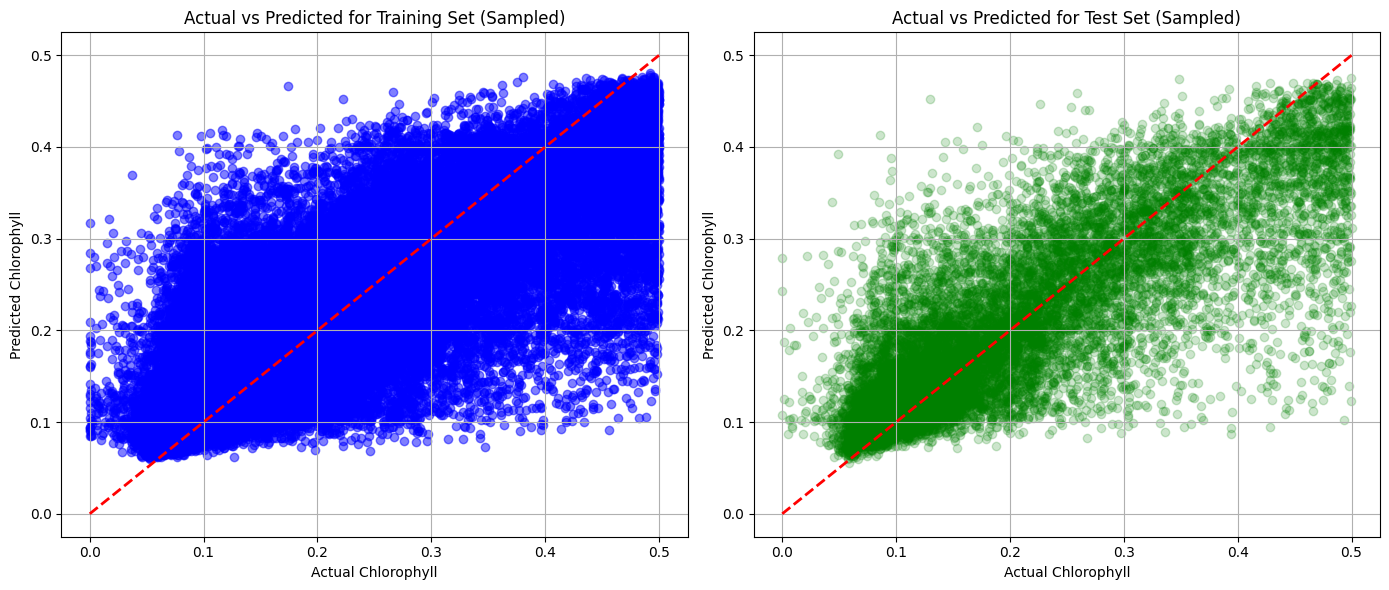

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# 假設你已經有 MLP_train_pred 和 MLP_test_pred 這兩個變數

# 將實際值和預測值組合為 DataFrame
train_results = pd.DataFrame({'Actual': y_train, 'Predicted': MLP_train_pred})
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': MLP_test_pred})

# 取 1/10 的點來繪製圖表
train_sample = train_results.sample(frac=0.1, random_state=42)
test_sample = test_results.sample(frac=0.1, random_state=42)

# 繪製訓練集的實際值與預測值圖表
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(train_sample['Actual'], train_sample['Predicted'], alpha=0.5, color='blue')
plt.plot([train_sample['Actual'].min(), train_sample['Actual'].max()], 
         [train_sample['Actual'].min(), train_sample['Actual'].max()], 'r--', lw=2)
plt.title('Actual vs Predicted for Training Set (Sampled)')
plt.xlabel('Actual Chlorophyll')
plt.ylabel('Predicted Chlorophyll')
plt.grid(True)

# 繪製測試集的實際值與預測值圖表
plt.subplot(1, 2, 2)
plt.scatter(test_sample['Actual'], test_sample['Predicted'], alpha=0.2, color='green')
plt.plot([test_sample['Actual'].min(), test_sample['Actual'].max()], 
         [test_sample['Actual'].min(), test_sample['Actual'].max()], 'r--', lw=2)
plt.title('Actual vs Predicted for Test Set (Sampled)')
plt.xlabel('Actual Chlorophyll')
plt.ylabel('Predicted Chlorophyll')
plt.grid(True)

plt.tight_layout()
plt.show()


只取1/100點畫看看

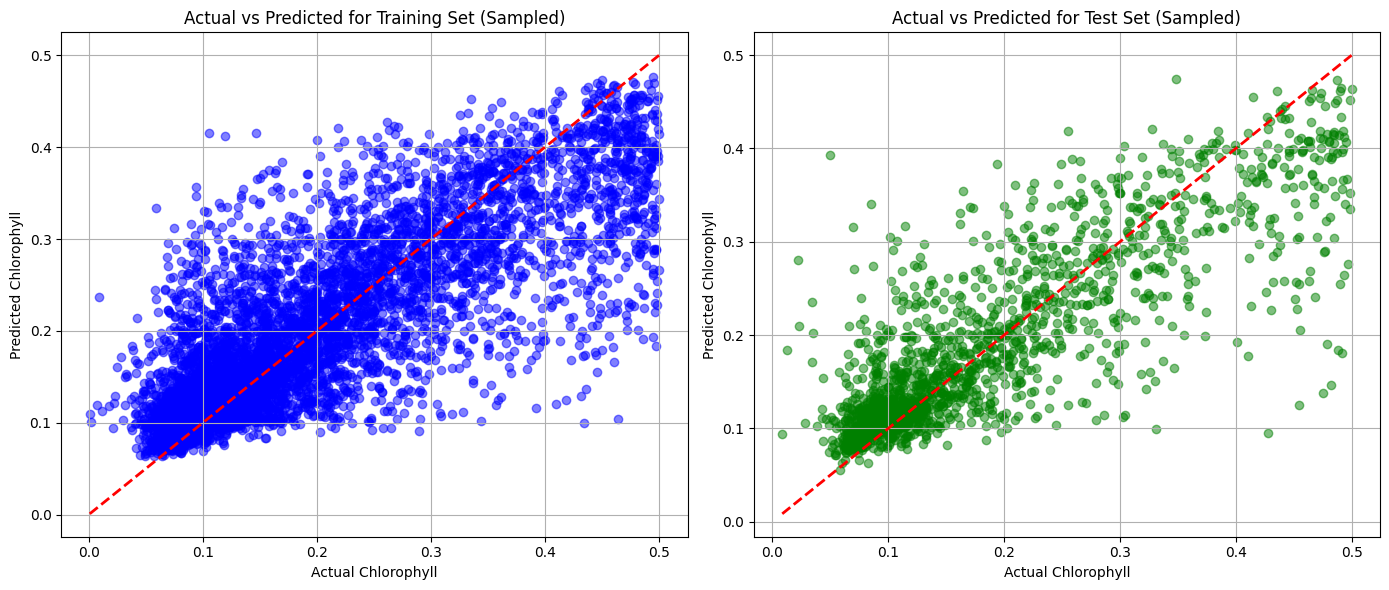

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# 假設你已經有 MLP_train_pred 和 MLP_test_pred 這兩個變數

# 將實際值和預測值組合為 DataFrame
train_results = pd.DataFrame({'Actual': y_train, 'Predicted': MLP_train_pred})
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': MLP_test_pred})

# 取 1/10 的點來繪製圖表
train_sample = train_results.sample(frac=0.01, random_state=42)
test_sample = test_results.sample(frac=0.01, random_state=42)

# 繪製訓練集的實際值與預測值圖表
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(train_sample['Actual'], train_sample['Predicted'], alpha=0.5, color='blue')
plt.plot([train_sample['Actual'].min(), train_sample['Actual'].max()], 
         [train_sample['Actual'].min(), train_sample['Actual'].max()], 'r--', lw=2)
plt.title('Actual vs Predicted for Training Set (Sampled)')
plt.xlabel('Actual Chlorophyll')
plt.ylabel('Predicted Chlorophyll')
plt.grid(True)

# 繪製測試集的實際值與預測值圖表
plt.subplot(1, 2, 2)
plt.scatter(test_sample['Actual'], test_sample['Predicted'], alpha=0.5, color='green')
plt.plot([test_sample['Actual'].min(), test_sample['Actual'].max()], 
         [test_sample['Actual'].min(), test_sample['Actual'].max()], 'r--', lw=2)
plt.title('Actual vs Predicted for Test Set (Sampled)')
plt.xlabel('Actual Chlorophyll')
plt.ylabel('Predicted Chlorophyll')
plt.grid(True)

plt.tight_layout()
plt.show()


篩到剩0~0.5

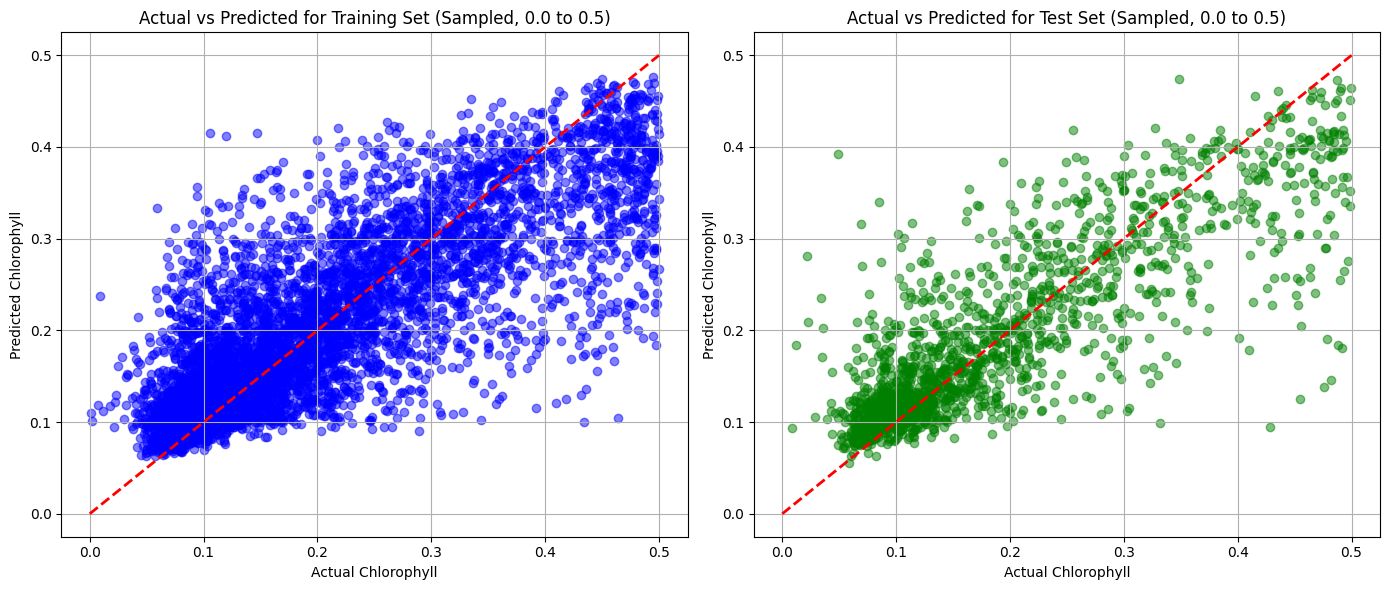

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# 假設你已經有 MLP_train_pred 和 MLP_test_pred 這兩個變數

# 將實際值和預測值組合為 DataFrame
train_results = pd.DataFrame({'Actual': y_train, 'Predicted': MLP_train_pred})
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': MLP_test_pred})

# 取 1/10 的點來繪製圖表
train_sample = train_results.sample(frac=0.01, random_state=42)
test_sample = test_results.sample(frac=0.01, random_state=42)

# 篩選出 Actual 和 Predicted 都在 0.0 到 0.5 範圍內的數據
train_sample_filtered = train_sample[(train_sample['Actual'] <= 0.5) & (train_sample['Predicted'] <= 0.5)]
test_sample_filtered = test_sample[(test_sample['Actual'] <= 0.5) & (test_sample['Predicted'] <= 0.5)]

# 繪製訓練集的實際值與預測值圖表
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(train_sample_filtered['Actual'], train_sample_filtered['Predicted'], alpha=0.5, color='blue')
plt.plot([0, 0.5], [0, 0.5], 'r--', lw=2)
plt.title('Actual vs Predicted for Training Set (Sampled, 0.0 to 0.5)')
plt.xlabel('Actual Chlorophyll')
plt.ylabel('Predicted Chlorophyll')
plt.grid(True)

# 繪製測試集的實際值與預測值圖表
plt.subplot(1, 2, 2)
plt.scatter(test_sample_filtered['Actual'], test_sample_filtered['Predicted'], alpha=0.5, color='green')
plt.plot([0, 0.5], [0, 0.5], 'r--', lw=2)
plt.title('Actual vs Predicted for Test Set (Sampled, 0.0 to 0.5)')
plt.xlabel('Actual Chlorophyll')
plt.ylabel('Predicted Chlorophyll')
plt.grid(True)

plt.tight_layout()
plt.show()


其他畫圖方式(1)密度圖

C:\Users\DIC\AppData\Local\Temp\ipykernel_17260\725376761.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=train_sample['Actual'], y=train_sample['Predicted'], cmap="Blues", shade=True, bw_adjust=.5)
C:\Users\DIC\AppData\Local\Temp\ipykernel_17260\725376761.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=test_sample['Actual'], y=test_sample['Predicted'], cmap="Greens", shade=True, bw_adjust=.5)


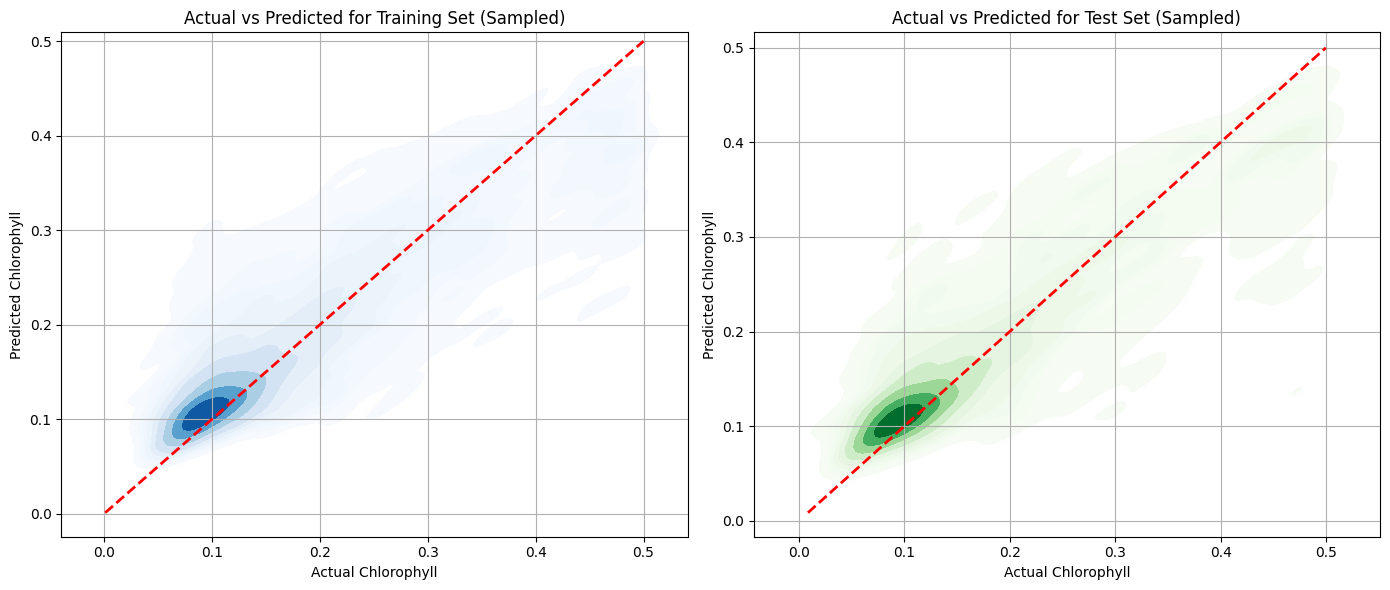

In [23]:
import seaborn as sns

plt.figure(figsize=(14, 6))

# 訓練集的密度圖
plt.subplot(1, 2, 1)
sns.kdeplot(x=train_sample['Actual'], y=train_sample['Predicted'], cmap="Blues", shade=True, bw_adjust=.5)
plt.plot([train_sample['Actual'].min(), train_sample['Actual'].max()], 
         [train_sample['Actual'].min(), train_sample['Actual'].max()], 'r--', lw=2)
plt.title('Actual vs Predicted for Training Set (Sampled)')
plt.xlabel('Actual Chlorophyll')
plt.ylabel('Predicted Chlorophyll')
plt.grid(True)

# 測試集的密度圖
plt.subplot(1, 2, 2)
sns.kdeplot(x=test_sample['Actual'], y=test_sample['Predicted'], cmap="Greens", shade=True, bw_adjust=.5)
plt.plot([test_sample['Actual'].min(), test_sample['Actual'].max()], 
         [test_sample['Actual'].min(), test_sample['Actual'].max()], 'r--', lw=2)
plt.title('Actual vs Predicted for Test Set (Sampled)')
plt.xlabel('Actual Chlorophyll')
plt.ylabel('Predicted Chlorophyll')
plt.grid(True)

plt.tight_layout()
plt.show()


篩到剩0~0.5的密度圖

C:\Users\DIC\AppData\Local\Temp\ipykernel_17260\3620916422.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=train_sample['Actual'], y=train_sample['Predicted'], cmap="Blues", shade=True, bw_adjust=.5)
C:\Users\DIC\AppData\Local\Temp\ipykernel_17260\3620916422.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=test_sample['Actual'], y=test_sample['Predicted'], cmap="Greens", shade=True, bw_adjust=.5)


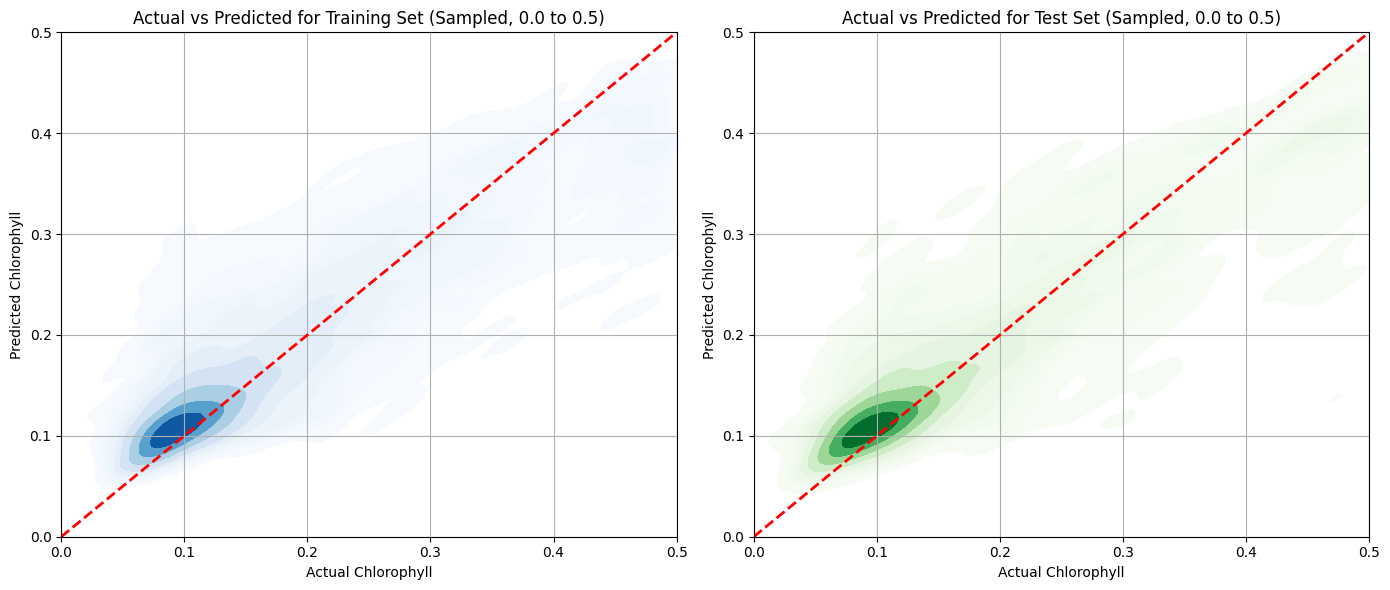

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# 訓練集的密度圖（篩選 0.0 到 0.5）
plt.subplot(1, 2, 1)
sns.kdeplot(x=train_sample['Actual'], y=train_sample['Predicted'], cmap="Blues", shade=True, bw_adjust=.5)
plt.xlim(0, 0.5)  # 限制 x 軸範圍
plt.ylim(0, 0.5)  # 限制 y 軸範圍
plt.plot([0, 0.5], [0, 0.5], 'r--', lw=2)
plt.title('Actual vs Predicted for Training Set (Sampled, 0.0 to 0.5)')
plt.xlabel('Actual Chlorophyll')
plt.ylabel('Predicted Chlorophyll')
plt.grid(True)

# 測試集的密度圖（篩選 0.0 到 0.5）
plt.subplot(1, 2, 2)
sns.kdeplot(x=test_sample['Actual'], y=test_sample['Predicted'], cmap="Greens", shade=True, bw_adjust=.5)
plt.xlim(0, 0.5)  # 限制 x 軸範圍
plt.ylim(0, 0.5)  # 限制 y 軸範圍
plt.plot([0, 0.5], [0, 0.5], 'r--', lw=2)
plt.title('Actual vs Predicted for Test Set (Sampled, 0.0 to 0.5)')
plt.xlabel('Actual Chlorophyll')
plt.ylabel('Predicted Chlorophyll')
plt.grid(True)

plt.tight_layout()
plt.show()


其他畫圖方式(2)直方圖或二維直方圖

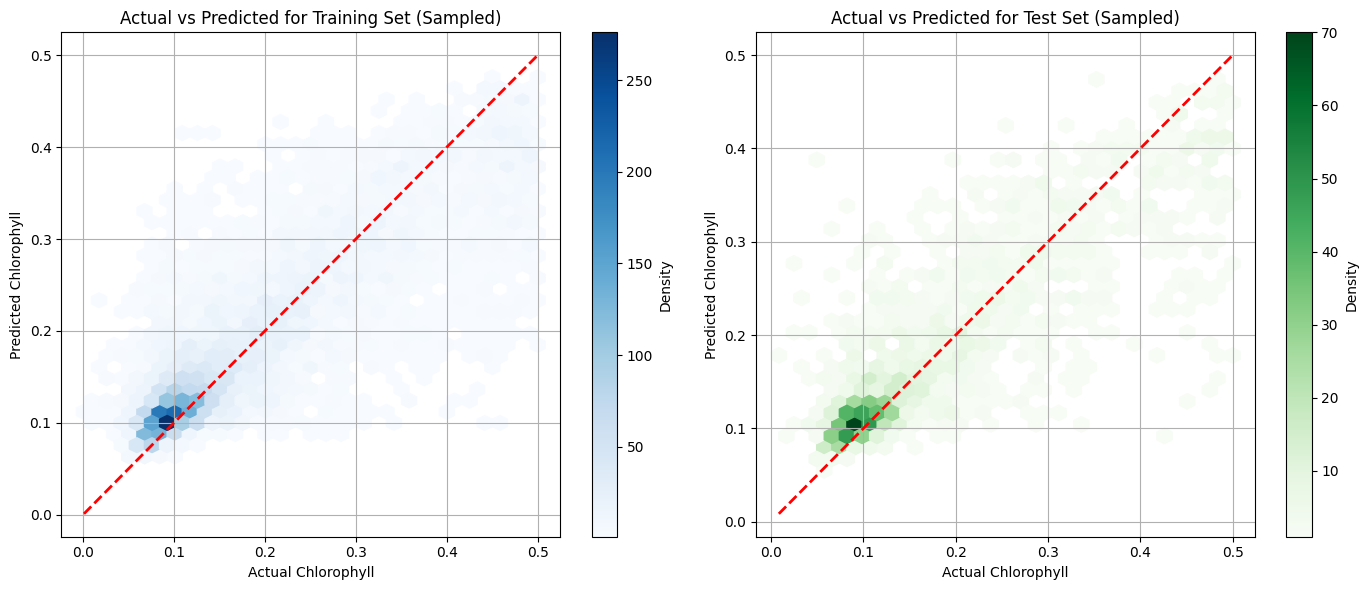

In [25]:
plt.figure(figsize=(14, 6))

# 訓練集的Hexbin圖
plt.subplot(1, 2, 1)
plt.hexbin(train_sample['Actual'], train_sample['Predicted'], gridsize=30, cmap='Blues', mincnt=1)
plt.colorbar(label='Density')
plt.plot([train_sample['Actual'].min(), train_sample['Actual'].max()], 
         [train_sample['Actual'].min(), train_sample['Actual'].max()], 'r--', lw=2)
plt.title('Actual vs Predicted for Training Set (Sampled)')
plt.xlabel('Actual Chlorophyll')
plt.ylabel('Predicted Chlorophyll')
plt.grid(True)

# 測試集的Hexbin圖
plt.subplot(1, 2, 2)
plt.hexbin(test_sample['Actual'], test_sample['Predicted'], gridsize=30, cmap='Greens', mincnt=1)
plt.colorbar(label='Density')
plt.plot([test_sample['Actual'].min(), test_sample['Actual'].max()], 
         [test_sample['Actual'].min(), test_sample['Actual'].max()], 'r--', lw=2)
plt.title('Actual vs Predicted for Test Set (Sampled)')
plt.xlabel('Actual Chlorophyll')
plt.ylabel('Predicted Chlorophyll')
plt.grid(True)

plt.tight_layout()
plt.show()


MLP best parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100, 50), 'learning_rate_init': 0.001}
Train MAE: 0.04544314582279486
Test MAE: 0.04550757005686396
Train RMSE: 0.06602368146072309
Test RMSE: 0.06616766340693175
Train R2: 0.6887073630883045
Test R2: 0.6879673887269256


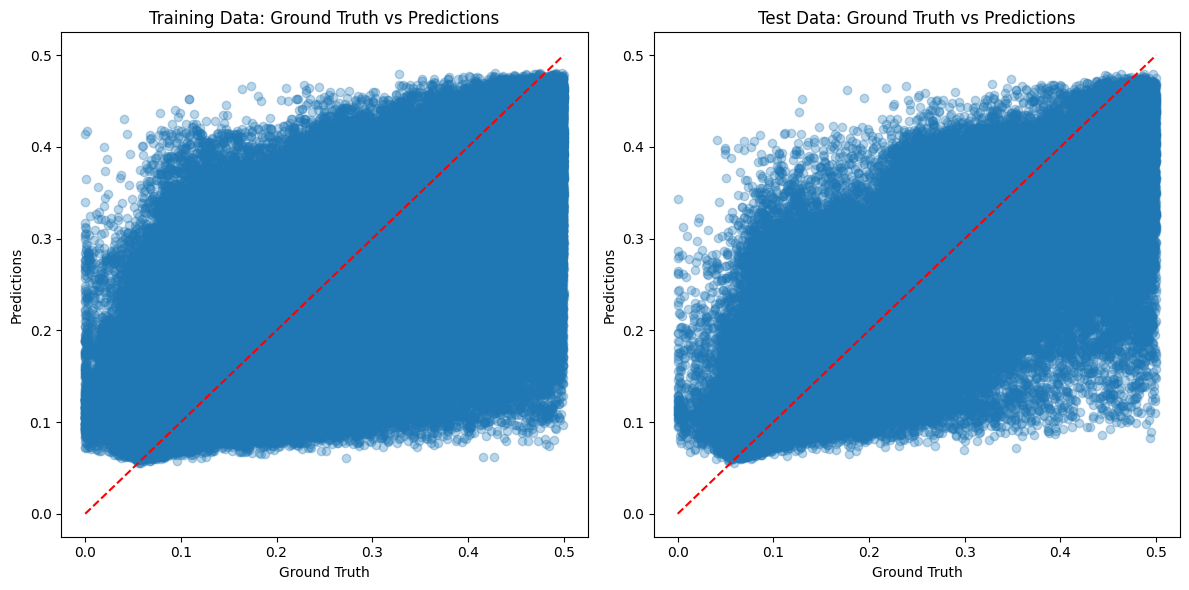

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

# Print the best parameters found by the grid search
print("MLP best parameters:", grid_mlp.best_params_)

# Make predictions
MLP_train_pred = optimized_mlp.predict(X_train)
MLP_test_pred = optimized_mlp.predict(X_test)

# Calculate the desired metrics
train_mae = mean_absolute_error(y_train, MLP_train_pred)
test_mae = mean_absolute_error(y_test, MLP_test_pred)
train_rmse = sqrt(mean_squared_error(y_train, MLP_train_pred))
test_rmse = sqrt(mean_squared_error(y_test, MLP_test_pred))
train_r2 = r2_score(y_train, MLP_train_pred)
test_r2 = r2_score(y_test, MLP_test_pred)

# Print the calculated metrics
print(f"Train MAE: {train_mae}")
print(f"Test MAE: {test_mae}")
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(f"Train R2: {train_r2}")
print(f"Test R2: {test_r2}")

# Plot ground truth vs predictions for training data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, MLP_train_pred, alpha=0.3)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.title('Training Data: Ground Truth vs Predictions')

# Plot ground truth vs predictions for test data
plt.subplot(1, 2, 2)
plt.scatter(y_test, MLP_test_pred, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.title('Test Data: Ground Truth vs Predictions')

plt.tight_layout()
plt.show()



GridSearch

In [27]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
import random

# Data Preparation
X = data.drop('Chlorophyll', axis=1)
y = data['Chlorophyll']

scaler = StandardScaler()
X = scaler.fit_transform(X)

test_ratio = 0.2
random_seed = random.randint(1, 100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state=42)

# Grid Search for Hyperparameter Tuning
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'alpha': [0.0001, 0.001],
    'learning_rate_init': [0.001, 0.01],
    'activation': ['relu', 'tanh']
}

mlp = MLPRegressor(solver='adam', max_iter=500, n_iter_no_change=10, tol=0.0001, verbose=1)

grid_mlp = GridSearchCV(mlp, param_grid, scoring='neg_mean_squared_error', n_jobs=-1, cv=5, verbose=1)
grid_mlp.fit(X_train, y_train)

optimized_mlp = grid_mlp.best_estimator_
print("MLP best parameters:", grid_mlp.best_params_)

MLP_train_pred = optimized_mlp.predict(X_train)
MLP_test_pred = optimized_mlp.predict(X_test)

train_mae = mean_absolute_error(y_train, MLP_train_pred)
test_mae = mean_absolute_error(y_test, MLP_test_pred)
train_rmse = sqrt(mean_squared_error(y_train, MLP_train_pred))
test_rmse = sqrt(mean_squared_error(y_test, MLP_test_pred))
train_r2 = r2_score(y_train, MLP_train_pred)
test_r2 = r2_score(y_test, MLP_test_pred)

print(f"Train MAE: {train_mae}")
print(f"Test MAE: {test_mae}")
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(f"Train R2: {train_r2}")
print(f"Test R2: {test_r2}")


Fitting 5 folds for each of 24 candidates, totalling 120 fits


KeyboardInterrupt: 

ChatGPT小測

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# 創建隨機森林模型
rf = RandomForestRegressor()

# 定義參數網格
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# 創建 GridSearchCV
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_absolute_error')

# 擬合模型
grid_search.fit(X_train, y_train)

# 輸出最佳參數
print("Best parameters found: ", grid_search.best_params_)

# 使用最佳參數擬合模型
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# 預測和評估
train_predictions = best_rf.predict(X_train)
test_predictions = best_rf.predict(X_test)

train_mae = mean_absolute_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

print(f'Train MAE: {train_mae}')
print(f'Test MAE: {test_mae}')
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')
print(f'Train R2: {train_r2}')
print(f'Test R2: {test_r2}')


KeyboardInterrupt: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
import random

# Data Preparation
X = data.drop('Chlorophyll', axis=1)
y = data['Chlorophyll']

# Transform features to reduce skewness and outliers
pt = PowerTransformer()
X_transformed = pt.fit_transform(X)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_transformed)

# Split data
test_ratio = 0.2
random_seed = random.randint(1, 100)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=test_ratio, random_state=42)

# Grid Search for Hyperparameter Tuning
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01],
    'activation': ['relu', 'tanh']
}

mlp = MLPRegressor(solver='adam', max_iter=1000, n_iter_no_change=10, tol=0.0001, verbose=1)

grid_mlp = GridSearchCV(mlp, param_grid, scoring='neg_mean_squared_error', n_jobs=-1, cv=5, verbose=1)
grid_mlp.fit(X_train, y_train)

optimized_mlp = grid_mlp.best_estimator_
print("MLP best parameters:", grid_mlp.best_params_)

MLP_train_pred = optimized_mlp.predict(X_train)
MLP_test_pred = optimized_mlp.predict(X_test)

train_mae = mean_absolute_error(y_train, MLP_train_pred)
test_mae = mean_absolute_error(y_test, MLP_test_pred)
train_rmse = sqrt(mean_squared_error(y_train, MLP_train_pred))
test_rmse = sqrt(mean_squared_error(y_test, MLP_test_pred))
train_r2 = r2_score(y_train, MLP_train_pred)
test_r2 = r2_score(y_test, MLP_test_pred)

print(f"Train MAE: {train_mae}")
print(f"Test MAE: {test_mae}")
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(f"Train R2: {train_r2}")
print(f"Test R2: {test_r2}")

# Plotting predicted vs actual values
plt.figure(figsize=(10, 5))
plt.scatter(y_test, MLP_test_pred, edgecolor='k', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('MLP Regressor: Predicted vs Actual Values')
plt.show()


KeyError: "['CHL_a'] not found in axis"

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Iteration 1, loss = 6.32653626
Iteration 2, loss = 5.69080226
Iteration 3, loss = 5.46073614
Iteration 4, loss = 5.34672596
Iteration 5, loss = 5.33626763
Iteration 6, loss = 5.32460802
Iteration 7, loss = 5.31523782
Iteration 8, loss = 5.31045129
Iteration 9, loss = 5.31308848
Iteration 10, loss = 5.30990993
Iteration 11, loss = 5.30044418
Iteration 12, loss = 5.30324241
Iteration 13, loss = 5.30220293
Iteration 14, loss = 5.29472935
Iteration 15, loss = 5.29361552
Iteration 16, loss = 5.29333172
Iteration 17, loss = 5.29046711
Iteration 18, loss = 5.28574016
Iteration 19, loss = 5.29149080
Iteration 20, loss = 5.28518508
Iteration 21, loss = 5.28530150
Iteration 22, loss = 5.28303725
Iteration 23, loss = 5.28363710
Iteration 24, loss = 5.28638064
Iteration 25, loss = 5.28146666
Iteration 26, loss = 5.27316044
Iteration 27, loss = 5.28026424
Iteration 28, loss = 5.27515379
Iteration 29, loss = 5.27823228
Iteration 30, loss 

c:\Users\DIC\anaconda3\envs\ocean\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38928 (\N{CJK UNIFIED IDEOGRAPH-9810}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\DIC\anaconda3\envs\ocean\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 28204 (\N{CJK UNIFIED IDEOGRAPH-6E2C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\DIC\anaconda3\envs\ocean\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\DIC\anaconda3\envs\ocean\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\DIC\anaconda3\envs\ocean\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27512 (\N{CJK UNIFIED IDE

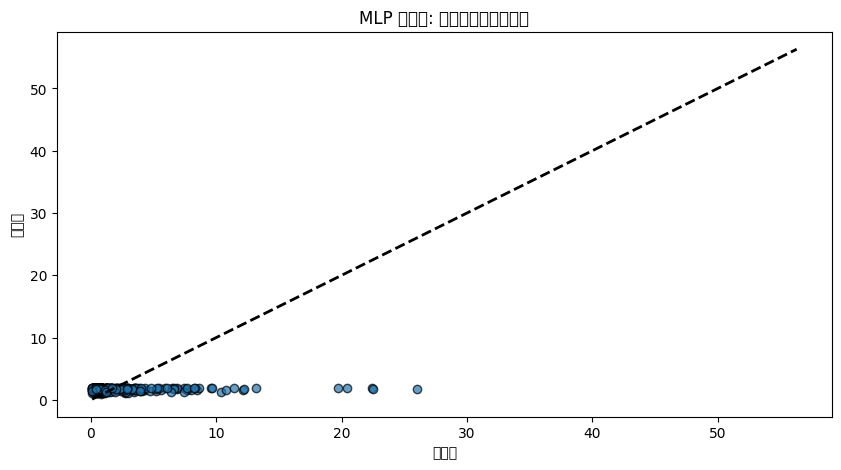

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
import random

# 數據準備
X = data.drop('Chlorophyll', axis=1)
y = data['Chlorophyll']

# 轉換特徵以減少偏斜和離群值
pt = PowerTransformer()
X_transformed = pt.fit_transform(X)

# 標準化特徵
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_transformed)

# 拆分數據
test_ratio = 0.2
random_seed = random.randint(1, 100)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=test_ratio, random_state=42)

# 超參數調優的網格搜索
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01],
    'activation': ['relu', 'tanh']
}

mlp = MLPRegressor(solver='adam', max_iter=1000, n_iter_no_change=10, tol=0.0001, verbose=1)

grid_mlp = GridSearchCV(mlp, param_grid, scoring='neg_mean_squared_error', n_jobs=-1, cv=5, verbose=1)
grid_mlp.fit(X_train, y_train)

optimized_mlp = grid_mlp.best_estimator_
print("MLP 最佳參數:", grid_mlp.best_params_)

MLP_train_pred = optimized_mlp.predict(X_train)
MLP_test_pred = optimized_mlp.predict(X_test)

train_mae = mean_absolute_error(y_train, MLP_train_pred)
test_mae = mean_absolute_error(y_test, MLP_test_pred)
train_rmse = sqrt(mean_squared_error(y_train, MLP_train_pred))
test_rmse = sqrt(mean_squared_error(y_test, MLP_test_pred))
train_r2 = r2_score(y_train, MLP_train_pred)
test_r2 = r2_score(y_test, MLP_test_pred)

print(f"訓練集 MAE: {train_mae}")
print(f"測試集 MAE: {test_mae}")
print(f"訓練集 RMSE: {train_rmse}")
print(f"測試集 RMSE: {test_rmse}")
print(f"訓練集 R2: {train_r2}")
print(f"測試集 R2: {test_r2}")

# 繪製預測值與實際值的圖表
plt.figure(figsize=(10, 5))
plt.scatter(y_test, MLP_test_pred, edgecolor='k', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('實際值')
plt.ylabel('預測值')
plt.title('MLP 回歸器: 預測值與實際值對比')
plt.show()


## 嘗試錯誤

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Define the features and target
X = data.drop('Chlorophyll', axis=1)
y = data['Chlorophyll']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
test_ratio = 0.2
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=test_ratio, random_state=42)


In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

# Create a basic MLPRegressor instance
basic_mlp = MLPRegressor(hidden_layer_sizes=(100,), solver='sgd', max_iter=200, n_iter_no_change=10, tol=0.0001, verbose=1)

# Fit the basic model to the training data
basic_mlp.fit(X_train, y_train)

# Make predictions
train_pred_basic = basic_mlp.predict(X_train)
test_pred_basic = basic_mlp.predict(X_test)

# Calculate the desired metrics
train_mae_basic = mean_absolute_error(y_train, train_pred_basic)
test_mae_basic = mean_absolute_error(y_test, test_pred_basic)
train_rmse_basic = sqrt(mean_squared_error(y_train, train_pred_basic))
test_rmse_basic = sqrt(mean_squared_error(y_test, test_pred_basic))
train_r2_basic = r2_score(y_train, train_pred_basic)
test_r2_basic = r2_score(y_test, test_pred_basic)

print(f"Train MAE: {train_mae_basic}")
print(f"Test MAE: {test_mae_basic}")
print(f"Train RMSE: {train_rmse_basic}")
print(f"Test RMSE: {test_rmse_basic}")
print(f"Train R2: {train_r2_basic}")
print(f"Test R2: {test_r2_basic}")


Iteration 1, loss = 7.61649620
Iteration 2, loss = 6.86356437
Iteration 3, loss = 6.15516097
Iteration 4, loss = 5.70236956
Iteration 5, loss = 5.49662646
Iteration 6, loss = 5.39074233
Iteration 7, loss = 5.34375018
Iteration 8, loss = 5.32978171
Iteration 9, loss = 5.32287846
Iteration 10, loss = 5.31831951
Iteration 11, loss = 5.31571100
Iteration 12, loss = 5.31346509
Iteration 13, loss = 5.31164148
Iteration 14, loss = 5.30968280
Iteration 15, loss = 5.30898127
Iteration 16, loss = 5.30713327
Iteration 17, loss = 5.31131941
Iteration 18, loss = 5.31008551
Iteration 19, loss = 5.30562195
Iteration 20, loss = 5.30206215
Iteration 21, loss = 5.30020196
Iteration 22, loss = 5.29935654
Iteration 23, loss = 5.29976680
Iteration 24, loss = 5.29843628
Iteration 25, loss = 5.29697986
Iteration 26, loss = 5.29595210
Iteration 27, loss = 5.29447701
Iteration 28, loss = 5.29414781
Iteration 29, loss = 5.29540359
Iteration 30, loss = 5.29371381
Iteration 31, loss = 5.29083616
Iteration 32, los

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(100,), (150, 100, 50), (200, 100)],
    'alpha': [0.0001, 0.001, 0.01, 0.05],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'activation': ['tanh', 'relu']
}

# Create a GridSearchCV instance
grid_mlp = GridSearchCV(MLPRegressor(solver='sgd', max_iter=200, n_iter_no_change=10, tol=0.0001, verbose=1), param_grid, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1, cv=5)

# Fit the grid search to the data
grid_mlp.fit(X_train, y_train)

# Get the best estimator
optimized_mlp = grid_mlp.best_estimator_

# Print the best parameters found by the grid search
print("MLP best parameters:", grid_mlp.best_params_)

# Make predictions with the optimized model
train_pred_optimized = optimized_mlp.predict(X_train)
test_pred_optimized = optimized_mlp.predict(X_test)

# Calculate metrics for the optimized model
train_mae_optimized = mean_absolute_error(y_train, train_pred_optimized)
test_mae_optimized = mean_absolute_error(y_test, test_pred_optimized)
train_rmse_optimized = sqrt(mean_squared_error(y_train, train_pred_optimized))
test_rmse_optimized = sqrt(mean_squared_error(y_test, train_pred_optimized))
train_r2_optimized = r2_score(y_train, train_pred_optimized)
test_r2_optimized = r2_score(y_test, test_pred_optimized)

print(f"Optimized Train MAE: {train_mae_optimized}")
print(f"Optimized Test MAE: {test_mae_optimized}")
print(f"Optimized Train RMSE: {train_rmse_optimized}")
print(f"Optimized Test RMSE: {test_rmse_optimized}")
print(f"Optimized Train R2: {train_r2_optimized}")
print(f"Optimized Test R2: {test_r2_optimized}")


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Iteration 1, loss = 6.17337026
Iteration 2, loss = 5.40016142
Iteration 3, loss = 5.35030190
Iteration 4, loss = 5.35242666
Iteration 5, loss = 5.33662619
Iteration 6, loss = 5.32521913
Iteration 7, loss = 5.32562900
Iteration 8, loss = 5.31664687
Iteration 9, loss = 5.33807791
Iteration 10, loss = 5.37940503
Iteration 11, loss = 5.31294729
Iteration 12, loss = 5.33337038
Iteration 13, loss = 5.33623597
Iteration 14, loss = 5.33072644
Iteration 15, loss = 5.33350632
Iteration 16, loss = 5.31726730
Iteration 17, loss = 5.32954214
Iteration 18, loss = 5.33036423
Iteration 19, loss = 5.37179097
Iteration 20, loss = 5.34644773
Iteration 21, loss = 5.31398629
Iteration 22, loss = 5.31279544
Iteration 23, loss = 5.32504859
Iteration 24, loss = 5.42365931
Iteration 25, loss = 5.35146383
Iteration 26, loss = 5.32799165
Iteration 27, loss = 5.31750000
Iteration 28, loss = 5.30106641
Iteration 29, loss = 5.31116377
Iteration 30, loss 

ValueError: Found input variables with inconsistent numbers of samples: [358, 1430]